# Εργαστήριο 11ο: Διαδικασία Gram-Schmidt & Ιδιοτιμές

## Ορθογωνιότητα

<b>Ορισμός:</b> Δύο μη-μηδενικά διανύσματα $u$ και $v$ του $\mathbb{R}^n$ λέγονται ορθογώνια (ή κάθετα) αν η γωνία που σχηματίζουν είναι ορθή.

Για να δηλώσουμε ότι τα $u$ και $v$ είναι ορθογώνια, χρησιμοποιούμε τη σημειολογία: $u \perp v$.

Η γωνία $\phi$ των διανυσμάτων $u$ και $v$ δίνεται από τον τύπο:

$$
\cos\phi = \frac{u \cdot v}{\Vert u \Vert\Vert v \Vert}
$$

<b>Σημείωση:</b> Ο αριθμητής είναι εσωτερικό γινόμενο διανυσμάτων, ενώ ο παρονομαστής γινόμενο αριθμών.

<b>Παράδειγμα:</b> Θεωρούμε τα διανύσματα $x = (2, 5)$, $y = (6, 5)$ στον Ευκλείδειο χώρο $\mathbb{R}^2$.

In [12]:
x = vector(RR, [2, 5])
y = vector(RR, [6, 5])

print ("Το εσωτερικό γινόμενο των x και y είναι:", x * y)   # ή x.inner_product(y)
print ("Η γωνία των x και y είναι:", arccos((x*y)/(x.norm()*y.norm())))

Το εσωτερικό γινόμενο των x και y είναι: 37.0000000000000
Η γωνία των x και y είναι: 0.495551673485828


Με τη βοήθεια του SageMath μπορούμε να σχεδιάσουμε τα διανύσματα στο επίπεδο (ή το χώρο στην περίπτωση του $\mathbb{R}^3$):

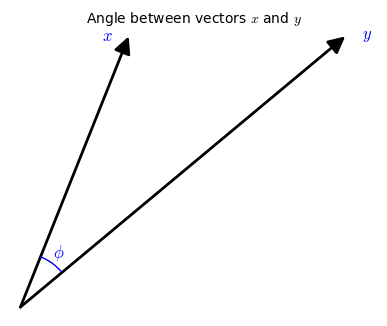

In [13]:
# Αγνοήστε τη σημασία αυτού του κελιού
x = vector(RR, [2, 5])
y = vector(RR, [6, 5])
e1 = vector(QQ, [1, 0])

p = plot(x, axes=False, color='black') + plot(y, axes=False, color='black') \
    + arc((0,0), 1.0, sector=(arccos(e1*y/(y.norm())), arccos(e1*x/(x.norm()))), color='blue') \
    + text("$x$",(2-0.4,5), fontsize='large') + text("$y$",(6+0.4,5), fontsize='large') \
    + text("$\\phi$",(0.7,1.0), fontsize='large')

show(p, figsize=[4,4], title='Angle between vectors $x$ and $y$')

<b>Παρατήρηση:</b> Επομένως, με βάση τον τύπο της γωνίας διανυσμάτων, μπορούμε να πούμε ισοδύναμα πως δύο διανύσματα είναι ορθογώνια αν-ν $u \cdot v = 0$.

<b>Ορισμός:</b> Ένα σύνολο διανυσμάτων $\{v_1, v_2, \ldots, v_n\}$ λέγεται ορθογώνιο (orthogonal) αν τα διανύσματα είναι ανά δύο ορθογώνια, δηλ. εάν $v_i \cdot v_j = 0, \forall i \neq j$. Εάν επιπλέον όλα τα διανύσματα έχουν μήκος ίσο με ένα, δηλ. $\Vert v_i \Vert = 1, \forall i=1,2,\ldots,n$, τότε λέγονται ορθοκανονικά (orthonormal).

<b>Παρατήρηση:</b> Εάν $v$ είναι ένα μη-μηδενικό διάνυσμα, τότε το διάνυσμα $\frac{v}{\Vert v \Vert}$ έχει μέτρο ίσο με ένα.

Το μέτρο ενός διανύσματος μπορεί να βρεθεί στο SageMath με τη μέθοδο `norm()` της κλάσης `vector`. Επιπλέον, για κάθε διάνυσμα, η μέθοδος `normalized()` της κλάσης `vector` επιστρέφει το αντίστοιχο κανονικοποιημένο διάνυσμα.

In [14]:
u = vector(RR, [1, 1, 1, 1])   # Ένα διάνυσμα του R^4
print (u.norm() )                # Το μέτρο (ή μήκος) του διανύσματος
print (u.normalized())           # Το κανονικοποιημένο διάνυσμα

2.00000000000000
(0.500000000000000, 0.500000000000000, 0.500000000000000, 0.500000000000000)


<b>Πρόταση:</b> Ένα σύνολο ορθογωνίων διανυσμάτων $\{v_1, v_2, \ldots, v_n\}$ είναι γραμμικά ανεξάρτητο.

In [15]:
v1 = vector(QQ, [1, 2, 3])
v2 = vector(QQ, [8/7, 2/7, -4/7])
v3 = vector(QQ, [-1/3, 2/3, -1/3])

print (v1*v2, v2*v3, v1*v3)   # Η βάση είναι ορθογώνια

V = matrix([v1, v2, v3])   # Σχηματίζουμε τον πίνακα που έχει τα v1, v2 και v3 ως γραμμές
show(V)
print ("Η βαθμίδα του V είναι:", rank(V))
#print "Η ορίζουσα του V είναι:", det(V)

0 0 0


[   1    2    3]
[ 8/7  2/7 -4/7]
[-1/3  2/3 -1/3]

Η βαθμίδα του V είναι: 3


Αφού η βαθμίδα του πίνακα $V$ είναι 3, δηλ. όσο η διάσταση του χώρου $\mathbb{R}^3$ μέσα στον οποίο έχουμε θεωρήσει τα διανύσματα $v_1, v_2, v_3$, αυτά είναι γραμμικά ανεξάρτητα. Εναλλακτικά, θα μπορούσαμε να ελέγξουμε την ορίζουσα του $V$. Αφού είναι μη-μηδενική (4 για την ακρίβεια), αυτό συνεπάγεται πως η βαθμίδα του $V$ είναι 3 και άρα τα $v_1, v_2, v_3$ είναι γραμμικά ανεξάρτητα.

<b>Πρόταση:</b> Αν $\{v_1, v_2, \ldots, v_n\}$ είναι μια βάση του $\mathbb{R}^n$ και $v \in \mathbb{R}^n$, τότε προφανώς ισχύει ότι: $v = \lambda_1 v_1 + \lambda_2 v_2 + \ldots + \lambda_n v_n$. Οι συντελεστές $\lambda_i$ θα δίνονται από τους τύπους:
<ul>
    <li>$\lambda_i = \frac{v \cdot v_i}{\Vert v_i \Vert^2}$, εάν η βάση είναι ορθογώνια.</li>
    <li>$\lambda_i = v \cdot v_i$, εάν η βάση είναι ορθοκανονική.</li>
</ul>

In [16]:
v1 = vector(QQ, [1, 2, 3])
v2 = vector(QQ, [8/7, 2/7, -4/7])
v3 = vector(QQ, [-1/3, 2/3, -1/3])

print ("v1*v2 =", v1*v2, ", v2*v3 =", v2*v3, ", v1*v3 =", v1*v3)   # Η βάση είναι ορθογώνια

import numpy
v = vector(QQ, numpy.random.random(3))   # Ένα τυχαίο τριδιάστατο διάνυσμα
show(v)

# Υπολογισμός των συντελεστών
l1 = v*v1/(v1.norm()^2)
l2 = v*v2/(v2.norm()^2)
l3 = v*v3/(v3.norm()^2)

# Επαλήθευση
print (l1*v1 + l2*v2 + l3*v3 == v)

v1*v2 = 0 , v2*v3 = 0 , v1*v3 = 0


(331945990/418926893, 6062869/1166046879, 111873867/113848894)

True


<b>Ορισμός:</b> Ένας πίνακας $A$ λέγεται ορθογώνιος αν είναι τετράγωνος και επιπλέον $A^T = A^{-1}$. Δηλαδή ένας ορθογώνιος πίνακας έχει ορθοκανονικές στήλες.

<b>Θεώρημα:</b> Το γινόμενο ορθογωνίων πινάκων είναι επίσης ορθογώνιος πίνακας.

In [18]:
A = matrix(QQ, 4, 4, [0,0,0,1, 0,0,1,0, 1,0,0,0, 0,1,0,0])
print ("Is A orthogonal?", A.T == A^-1)
B = matrix(QQ, 4, 4, [1,0,0,0, 0,0,0,1, 0,1,0,0, 0,0,1,0])
print ("Is B orthogonal?", B.T == B^-1)
C = A * B
print ("Is C orthogonal?", C.T == C^-1)

Is A orthogonal? True
Is B orthogonal? True
Is C orthogonal? True


## Η Διαδικασία Gram-Schmidt

<b>Στόχος:</b> Έστω ότι γνωρίζουμε μια τυχούσα βάση $\{x_1, x_2, \ldots, x_n\}$ του Ευκλείδειου χώρου $\mathbb{R}^n$. Θέλουμε να βρούμε:
<ul>
    <li>Μια ορθογώνια βάση $\{y_1, y_2, \ldots, y_n\}$ του $\mathbb{R}^n$.</li>
    <li>Μια ορθοκανονική βάση $\{z_1, z_2, \ldots, z_n\}$ του $\mathbb{R}^n$.</li>
</ul>

Απάντηση στο πρόβλημα δίνει η διαδικασία ορθογωνιοποίησης των Gram-Schmidt (Gram-Schmidt Orthogonalization ή GSO για συντομία) που μας παρέχει έναν τρόπο με τον οποίο μπορούμε να κατασκευάσουμε μια τέτοια βάση δοθείσας μιας οποιασδήποτε βάσης του $\mathbb{R}^n$.

<b>Σημείωση:</b> Εάν θέλουμε το SageMath να μας επιστρέψει ορθοκανονική βάση, χρησιμοποιούμε την παράμετρο `orthonormal` με τη λογική τιμή `True` (η εξ ορισμού τιμή της είναι `False`).

In [19]:
B = matrix(RDF, 3, 3, [1, 2, 3, 1, 0, -1, 0, 1, 3])   # RDF = Real Double Field όπως το RR, αλλά με ακρίβεια double.
B.gram_schmidt(orthonormal=True)

(
[-0.2672612419124243 -0.5345224838248488 -0.8017837257372732]
[ 0.8728715609439698 0.21821789023599247 -0.4364357804719846]
[ 0.4082482904638632  -0.816496580927726   0.408248290463863],

[-3.7416573867739413                 0.0                 0.0]
[  0.534522483824849   1.309307341415954                 0.0]
[-2.9398736610366685 -1.0910894511799616 0.40824829046386313]
)

Το επιστρεφόμενο αποτέλεσμα είναι μια πλειάδα με δύο στοιχεία. Το 1ο είναι η ορθογωνιοποιημένη βάση που προκύπτει από τη διαδικασία Gram-Schmidt. Το 2ο αποτέλεσμα είναι ένας κάτω τριγωνικός πίνακας που περιέχει τους συντελεστές προβολής.

## Ιδιοτιμές - Ιδιοδιανύσματα

Το χαρακτηριστικό πολυώνυμο ενός πίνακα μπορεί να βρεθεί στο SageMath με τη μέθοδο `characteristic_polynomial()` (ή `charpoly()` για συντομία) της κλάσης `matrix`.

In [23]:
A = matrix(QQ, 3, 3, [4, -1, 6, 2, 1, 6, 2, -1, 8])
print ("Ο πίνακας A είναι:")
show(A)
print ("Το χαρακτηριστικό πολυώνυμο του A είναι:")
print (A.charpoly())   # ή A.characteristic_polynomial()

Ο πίνακας A είναι:


[ 4 -1  6]
[ 2  1  6]
[ 2 -1  8]

Το χαρακτηριστικό πολυώνυμο του A είναι:
x^3 - 13*x^2 + 40*x - 36


Παρατηρήστε πως το SageMath εξ ορισμού χρησιμοποιεί το $x$ ως μεταβλητή του πολυωνύμου, αντί του $\lambda$. Εάν θέλουμε να αλλάξουμε τη μεταβλητή του χαρακτηριστικού πολυωνύμου, πρέπει να μεταβιβάσουμε στην παράμετρο `var` της μεθόδου `charpoly()` (ή `characteristic_polynomial()`) μια συμβολοσειρά με το όνομα της μεταβλητής που θέλουμε να έχει το πολυώνυμο. Έτσι, για να πάρουμε το ίδιο πολυώνυμο με το παραπάνω κελί, αλλά ως προς τη μεταβλητή $l$, θα πρέπει να γράψουμε:

In [24]:
print (A.charpoly(var = 'l'))   # Η μεταβλητή του πολυωνύμου θα είναι l.

l^3 - 13*l^2 + 40*l - 36


Και οι ρίζες του θα είναι οι ιδιοτιμές του πίνακα $A$:

In [25]:
p = A.charpoly(var = 'l')
p.roots()

[(9, 1), (2, 2)]

<b>Σημείωση:</b> Έστω ότι $\lambda_1, \lambda_2, \ldots, \lambda_\rho$ είναι οι διαφορετικές ανά δύο ρίζες του χαρακτηριστικού πολυωνύμου $p(\lambda)$ με αντίστοιχες πολλαπλότητες $\nu_1, \nu_2, \ldots, \nu_\rho$. Το $p(\lambda)$ τότε μπορεί να γραφεί στην παραγοντοποιημένη του μορφή ως: $p(\lambda) = (\lambda_1 - \lambda)^{\nu_1} (\lambda_2 - \lambda)^{\nu_2} \cdots (\lambda_\rho - \lambda)^{\nu_\rho}$. Τη μορφή αυτή μπορούμε να ανακτήσουμε άμεσα στο SageMath με τη μέθοδο `fcp` της κλάσης `matrix`.

In [26]:
A = matrix(QQ, 3, 3, [4, -1, 6, 2, 1, 6, 2, -1, 8])
A.fcp(var = 'l')   # Η παράμετρος var λειτουργεί όπως και στις μεθόδους charpoly & characteristic_polynomial.

(l - 9) * (l - 2)^2

Επιστρέφοντας στην άσκηση, βλέπουμε ότι οι ιδιοτιμές του πίνακα $A$ είναι το $\lambda_1 = 9$ με πολλαπλότητα 1 και το $\lambda_2 = 2$ με πολλαπλότητα 2. Παρατηρήστε ότι το άθροισμα των πολλαπλοτήτων των ριζών είναι ίσο με το βαθμό του χαρακτηριστικού πολυωνύμου και την τάξη του πίνακα $A$.

Οι ιδιοτιμές ενός πίνακα μπορούν να ανακτηθούν και άμεσα με τη μέθοδο `eigenvalues()` της κλάσης `matrix`:

In [27]:
A.eigenvalues()

[9, 2, 2]

Η `eigenvalues()` μας επιστρέφει μια λίστα με τις ιδιοτιμές του πίνακα για τον οποίο καλείται. Η κάθε ιδιοτιμή περιλαμβάνεται στη λίστα τόσες φορές όσες είναι η πολλαπλότητά της.

<b>Πρόταση:</b> Αν $A$ είναι ένας $n \times n$ πίνακας με ιδιοτιμές $\lambda_1, \lambda_2, \ldots, \lambda_n$, τότε:
<ul>
    <li>$det(A) = \lambda_1 \cdot \lambda_2 \cdot \ldots \cdot \lambda_n$</li>
    <li>$tr(A) = \lambda_1 + \lambda_2 + \ldots + \lambda_n$</li>
</ul>

Πράγματι, για το παράδειγμά μας ειναι:

In [28]:
det(A) == prod(A.eigenvalues())   # Η συνάρτηση prod του SageMath υπολογίζει το γινόμενο των στοιχείων μιας λίστας.

True

In [29]:
A.trace() == sum(A.eigenvalues())   # Η συνάρτηση sum της Python υπολογίζει το άθροισμα των στοιχείων μιας ακολουθίας.

True

Μπορούμε να βρούμε τα ιδιοδιανύσματα ενός πίνακα με τη μέθοδο `eigenvectors()` της κλάσης `matrix`:

In [30]:
show(A.eigenvectors_right())

[(9, [
  (1, 1, 1)
  ], 1), (2, [
  (1, 0, -1/3),
  (0, 1, 1/6)
  ], 2)]

Ας εξετάσουμε λίγο πιο διεξοδικά το αποτέλεσμα που μας επέστρεψε το SageMath. Αυτό είναι μια λίστα της οποίας τα στοιχεία είναι πλειάδες (τριάδες για την ακρίβεια) της μορφής:

(ιδιοτιμή, [λίστα αντίστοιχων ιδιοδιανυσμάτων], πολλαπλότητα ιδιοτιμής)

Άρα, το αποτέλεσμα που λάβαμε σημαίνει πως:
<ul>
    <li>Το $\lambda_1 = 9$ είναι μια ιδιοτιμή του πίνακα $A$ με πολλαπλότητα 1 και πως ο αντίστοιχος ιδιοχώρος $V(1)$ παράγεται από το διάνυσμα $v_1 = (1, 1, 1)$. Επειδή μάλιστα το $v_1 = (1, 1, 1)$ είναι γραμμικά ανεξάρτητο (ως μη-μηδενικό), αποτελεί μια βάση του $V(1)$.</li>
    <li>Το $\lambda_2 = 2$ είναι μια ιδιοτιμή του πίνακα $A$ με πολλαπλότητα 2 και πως ο αντίστοιχος ιδιοχώρος $V(2)$ παράγεται από τα διανύσματα $v_2 = (1, 0, -\frac{1}{3})$ και $v_3 = (0, 1, \frac{1}{6})$. Επειδή μάλιστα τα $v_2 = (1, 0, -\frac{1}{3})$ και $v_3 = (0, 1, \frac{1}{6})$ είναι γραμμικά ανεξάρτητα (βλ. επόμενο κελί), αποτελούν μια βάση του $V(2)$.</li>
</ul>

In [31]:
# Ελέγχουμε αν τα διανύσματα v2 και v3 είναι γραμμικά ανεξάρτητα με βάση τον ορισμό
v2 = vector(QQ, [1, 0, -1/3])
v3 = vector(QQ, [0, 1, 1/6])
var('x, y')
solve(list(x*v2 + y*v3), [x, y])   # Το x*v2+y*v3 είναι vector. Θα πρέπει να μετατραπεί σε list για να το χειριστεί η solve.

[[x == 0, y == 0]]

Εάν θέλουμε, μπορούμε να κανονικοποιήσουμε τα διανύσματα βάσης των ιδιοχώρων μας. Πχ:

In [32]:
v1 = vector(QQ, [1, 1, 1])
v2 = vector(QQ, [1, 0, -1/3])
v3 = vector(QQ, [0, 1, 1/6])
print (v1.normalized())
print (v2.normalized())
print (v3.normalized())

(1/3*sqrt(3), 1/3*sqrt(3), 1/3*sqrt(3))
(3/10*sqrt(10), 0, -1/10*sqrt(10))
(0, 6/37*sqrt(37), 1/37*sqrt(37))


Τους ιδιοχώρους $V(\lambda_i)$ που αντιστοιχούν στις ιδιοτιμές $\lambda_i$ ενός πίνακα $A$ μπορούμε να τους ανακτήσουμε και με τη μέθοδο `eigenspaces_right()` της κλάσης `matrix`:

In [33]:
A.eigenspaces_right()

[
(9, Vector space of degree 3 and dimension 1 over Rational Field
User basis matrix:
[1 1 1]),
(2, Vector space of degree 3 and dimension 2 over Rational Field
User basis matrix:
[   1    0 -1/3]
[   0    1  1/6])
]

Η λίστα που μας επιστρέφει η μέθοδος `eigenspaces_right()` έχει ως στοιχεία πλειάδες (για την ακρίβεια δυάδες) της μορφής:

(ιδιοτιμή, περιγραφή του αντίστοιχου ιδιοχώρου)

Έτσι, από το παραπάνω αποτέλεσμα βλέπουμε πως μας δίνονται οι ίδιες πληροφορίες που εξάγαμε νωρίτερα με τη μέθοδο `eigenvectors_right()`.